In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [26]:
import networkx as nx
import EoN
import numpy as np
import matplotlib.pyplot as plt

## Experiment in estimating R0

Estimated R0: 18.083
Wall time: 687 ms


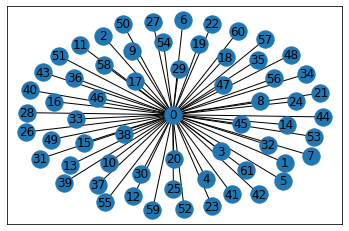

In [213]:
%%time
# Parameters
nodes = 61
transmission_rate = 0.03
recovery_rate = 0.07 
trials = 1000

# Build star graph (we will infect center node and all outer nodes will be susceptible)
G = nx.star_graph(nodes)
nx.draw_networkx(G)

# Run experiment 'trials' times
total_infected = 0
for i in range(trials):
    # Begin with only center node infected
    t, S, I, R = EoN.fast_SIR(G, transmission_rate, recovery_rate, initial_infecteds=0)
    
    # Check if someone was infected
    if R[-1] > 1:
        # Keep track of total # of individuals central node infects
        total_infected += R[-1] - 1
    
# Print average # of infections (aka R0)
estimated_R0 = total_infected / trials
print(f'Estimated R0: {estimated_R0}')